In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 

In [3]:
#df_1 = pd.read_csv("com_overweight.csv")
#df_2 = pd.read_csv("com_stunting.csv")
#df_3 = pd.read_csv("com_wast.csv")
#df_4 = pd.read_csv("comwast_severe.csv")

#merged_df1 = pd.merge(df_1, df_2,on=['ISO3Code','UNRegion','WB_Latest','age','sex','mothers_education'])
#merged_df2 = pd.merge(df_3, df_4,on=['ISO3Code','UNRegion','WB_Latest','age','sex','mothers_education'])

#merged_df = pd.merge(merged_df1, merged_df2,on=['ISO3Code','UNRegion','WB_Latest','age','sex','mothers_education'])



#result_df=merged_df[['ISO3Code','UNRegion','WB_Latest','age','sex','mothers_education','rural_stunting_r','rural_stunting_weighted','stunt_weighted','stunt_r','rural_overweight_r','rural_overweight_weighted','over_weighted','over_r','rural_r','rural_weighted_N','Wasting_Weighted','Wasting_r','rural_severe_r','rural_severe_weighted','severe_Weighted','severe_r']]

#result_df['stunt_weighted']=result_df['stuntingedu_weighted']+result_df['stunting_weighted']
#result_df['stunt_r']=(result_df['stuntingedu_r']*result_df['stuntingedu_weighted']+result_df['stunting_r']*result_df['stunting_weighted'])/result_df['stunt_weighted']
#result_df.drop(['stuntingedu_r','stuntingedu_weighted','stunting_r','stunting_weighted'],inplace=True,axis=1)
result_df=pd.read_csv("COM_Final.csv")
result_df

ISO3Code UNRegion            WB_Latest           age      sex  \
0          AFG     Asia           Low Income    month_0_5      male   
1          AFG     Asia           Low Income    month_0_5      male   
2          AFG     Asia           Low Income    month_0_5      male   
3          AFG     Asia           Low Income    month_0_5      male   
4          AFG     Asia           Low Income    month_0_5      male   
...        ...      ...                  ...           ...      ...   
13495      ZWE   Africa  Lower Middle Income  month_24_59    female   
13496      ZWE   Africa  Lower Middle Income  month_24_59    female   
13497      ZWE   Africa  Lower Middle Income  month_24_59    female   
13498      ZWE   Africa  Lower Middle Income  month_24_59    female   
13499      ZWE   Africa  Lower Middle Income  month_24_59    female   

      mothers_education  rural_stunting_r  rural_stunting_weighted  \
0                  none              40.5                  14799.8   
1               primary              40.5                  14799.8   
2          none-primary              40.5                  14799.8   
3             secondary              40.5                  14799.8   
4                higher              40.5                  14799.8   
...                 ...               ...                      ...   
13495           primary              25.6                   4216.5   
13496      none-primary              25.6                   4216.5   
13497         secondary              25.6                   4216.5   
13498            higher              25.6                   4216.5   
13499  higher_secondary              25.6                   4216.5   

       stunt_weighted    stunt_r  ...  over_weighted    over_r  rural_r  \
0             16820.0  39.161088  ...        17281.8  4.487123      5.4   
1              2298.7  23.703885  ...         2333.6  5.119386      5.4   
2             18150.6  38.414576  ...        18623.0  4.277103      5.4   
3              1621.2  20.111917  ...         1649.5  7.965074      5.4   
4              2173.8  18.484184  ...         2262.1  6.337408      5.4   
...               ...        ...  ...            ...       ...      ...   
13495          3737.8  25.667625  ...         3740.7  1.901708      2.8   
13496          3877.5  25.620637  ...         3880.7  1.912469      2.8   
13497          5363.6  22.273214  ...         5365.9  2.253423      2.8   
13498          2301.3  20.635615  ...         2300.6  2.021620      2.8   
13499          5806.8  21.511979  ...         5806.8  2.347711      2.8   

       rural_weighted_N  Wasting_Weighted  Wasting_r  rural_severe_r  \
0               15215.3           17281.8   5.469895             1.5   
1               15215.3            2333.6   7.026328             1.5   
2               15215.3           18623.0   5.450458             1.5   
3               15215.3            1649.5   8.226875             1.5   
4               15215.3            2262.1   6.476115             1.5   
...                 ...               ...        ...             ...   
13495            4216.4            3740.7   2.553132             0.4   
13496            4216.4            3880.7   2.624939             0.4   
13497            4216.4            5365.9   2.522738             0.4   
13498            4216.4            2300.6   2.076658             0.4   
13499            4216.4            5806.8   2.475816             0.4   

       rural_severe_weighted  severe_Weighted  severe_r  
0                    15215.3          17281.8  1.697622  
1                    15215.3           2333.6  1.805691  
2                    15215.3          18623.0  1.595920  
3                    15215.3           1649.5  3.220327  
4                    15215.3           2262.1  2.177415  
...                      ...              ...       ...  
13495                 4216.4           3740.7  0.150285  
13496                 4216.4           3880.7  0.204156  
13497                 42

In [4]:
new_age_value = '1'
df['age'] = new_age_value

mean_operation = lambda x: x.mean()

merged_df = df.groupby(['ISO3Code', 'UNRegion', 'WB_Latest', 'sex', 'mothers_education']) 
              .agg({'age': lambda x: x.iloc[0], 'stunt_r': mean_operation}) 
              .reset_index()


IndentationError: unexpected indent (914381932.py, line 7)

<Axes: >

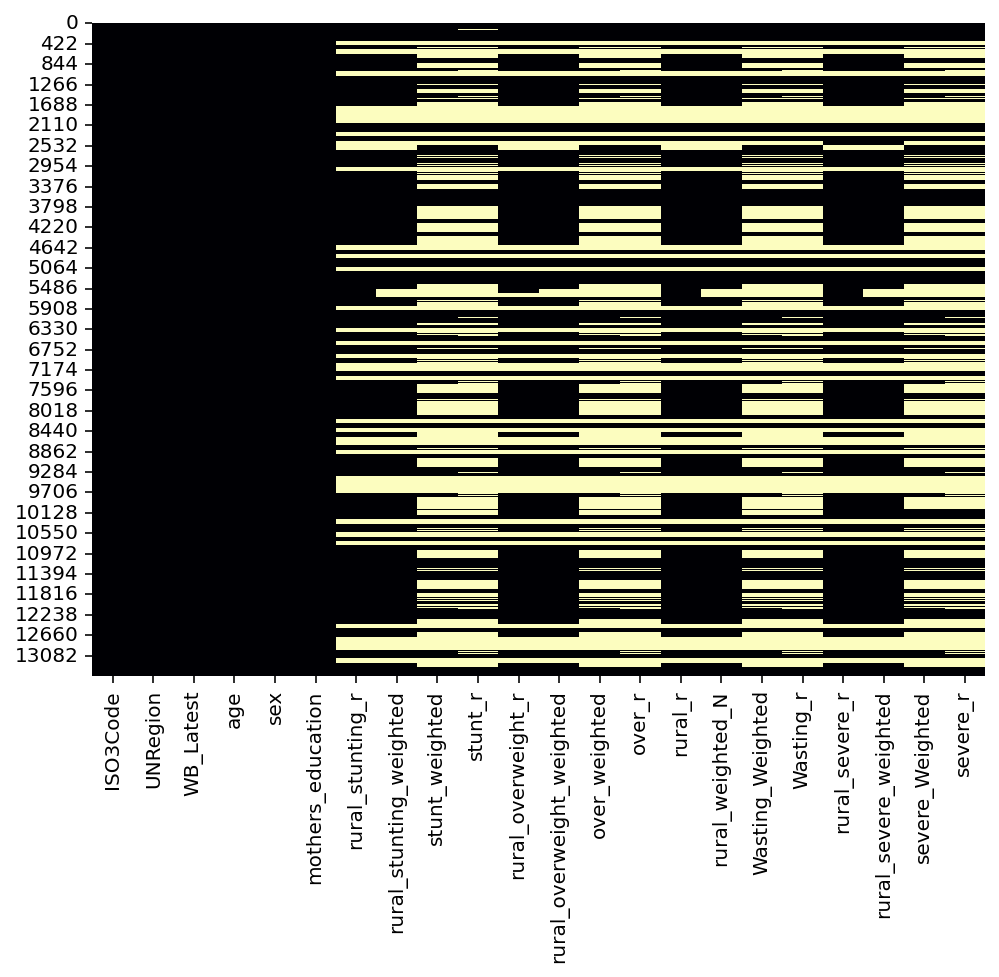

In [5]:
plt.figure(figsize = (8,6))
sb.heatmap(result_df.isnull(), cbar=False , cmap = 'magma')


In [6]:
colums_check=['rural_stunting_r','rural_stunting_weighted','rural_overweight_r','rural_overweight_weighted','rural_r','rural_weighted_N','rural_severe_r','rural_severe_weighted']


count = result_df[colums_check].isnull().all(axis=1).sum()
result_df.dropna(subset=colums_check, how='all', inplace=True)
count = len(result_df)
count
#result_df.columns.tolist()

10170

In [7]:
def calculate_Nstatus(row):
    stunting, overweight, severe, wasting = row['stunt_r'], row['over_r'], row['severe_r'], row['Wasting_r']
    is_stunting = stunting >= max(overweight, severe, wasting)
    is_severe = severe >= max(stunting, overweight, wasting)
    is_wasting = wasting >= max(stunting, overweight, severe)
    is_overweight = overweight >= max(stunting, severe, wasting)
    
    if is_stunting:
        return "stunting"
    if is_severe:
        return "severe"
    if is_wasting:
        return "wasting"
    if is_overweight:
        return "overweight"


In [8]:
def calculate_Rstatus(row):
    stunting, overweight, severe, wasting = row['rural_stunting_r'], row['rural_overweight_r'], row['rural_severe_r'], row['rural_r']
    is_stunting = stunting >= max(overweight, severe, wasting)
    is_severe = severe >= max(stunting, overweight, wasting)
    is_wasting = wasting >= max(stunting, overweight, severe)
    is_overweight = overweight >= max(stunting, severe, wasting)
    
    if is_stunting:
        return "stunting"
    if is_severe:
        return "severe"
    if is_wasting:
        return "wasting"
    if is_overweight:
        return "overweight"

In [9]:
result_df.columns = result_df.columns.fillna(0)
result_df['Normal_status'] = result_df.apply(calculate_Nstatus, axis=1)

#result_df['Normal_status'] = calculate_status(result_df['stunt_r'], result_df['over_r'], result_df['severe_r'], result_df['Wasting_r'])
result_df['Rural_status'] = result_df.apply(calculate_Rstatus, axis=1)
result_df.drop(colums_check,inplace=True,axis=1)
result_df.reset_index(drop=True)
result_df['Status'] = result_df['Normal_status'].fillna(result_df['Rural_status'])

result_df.drop(['Normal_status','Rural_status'],inplace=True,axis=1)
result_df.dropna(subset=['stunt_r','over_r','severe_r','Wasting_r'], inplace=True)
result_df.to_csv('combined.csv', index=False)
result_df.reset_index(drop=True)
#result_df.drop(['ISO3Code'],inplace=True,axis=1)
result_df


ISO3Code UNRegion            WB_Latest           age      sex  \
0          AFG     Asia           Low Income    month_0_5      male   
1          AFG     Asia           Low Income    month_0_5      male   
2          AFG     Asia           Low Income    month_0_5      male   
3          AFG     Asia           Low Income    month_0_5      male   
4          AFG     Asia           Low Income    month_0_5      male   
...        ...      ...                  ...           ...      ...   
13495      ZWE   Africa  Lower Middle Income  month_24_59    female   
13496      ZWE   Africa  Lower Middle Income  month_24_59    female   
13497      ZWE   Africa  Lower Middle Income  month_24_59    female   
13498      ZWE   Africa  Lower Middle Income  month_24_59    female   
13499      ZWE   Africa  Lower Middle Income  month_24_59    female   

      mothers_education  stunt_weighted    stunt_r  over_weighted    over_r  \
0                  none         16820.0  39.161088        17281.8  4.487123   
1               primary          2298.7  23.703885         2333.6  5.119386   
2          none-primary         18150.6  38.414576        18623.0  4.277103   
3             secondary          1621.2  20.111917         1649.5  7.965074   
4                higher          2173.8  18.484184         2262.1  6.337408   
...                 ...             ...        ...            ...       ...   
13495           primary          3737.8  25.667625         3740.7  1.901708   
13496      none-primary          3877.5  25.620637         3880.7  1.912469   
13497         secondary          5363.6  22.273214         5365.9  2.253423   
13498            higher          2301.3  20.635615         2300.6  2.021620   
13499  higher_secondary          5806.8  21.511979         5806.8  2.347711   

       Wasting_Weighted  Wasting_r  severe_Weighted  severe_r    Status  
0               17281.8   5.469895          17281.8  1.697622  stunting  
1                2333.6   7.026328           2333.6  1.805691  stunting  
2               18623.0   5.450458          18623.0  1.595920  stunting  
3                1649.5   8.226875           1649.5  3.220327  stunting  
4                2262.1   6.476115           2262.1  2.177415  stunting  
...                 ...        ...              ...       ...       ...  
13495            3740.7   2.553132           3740.7  0.150285  stunting  
13496            3880.7   2.624939           3880.7  0.204156  stunting  
13497            5365.9   2.522738           5365.9  0.296027  stunting  
13498            2300.6   2.076658           2300.6  0.119165  stunting  
13499            5806.8   2.475816           5806.8  0.303921  stunting  

[5918 rows x 15 columns]

In [10]:


from random import random
import math
from collections import deque
from graphviz import Digraph

class Node(object):
    def __init__(self):
        self.value = None
        self.next = None
        self.childs = None
        self.name = ""

# Simple class of Decision Tree
# Aimed for who want to learn Decision Tree, so it is not optimized
class DecisionTree(object):
    def __init__(self, sample, attributes, labels, criterion):
        self.sample = sample
        self.attributes = attributes
        self.labels = labels
        self.labelCodes = None
        self.labelCodesCount = None
        self.initLabelCodes()
        self.criterion = criterion
        # print(self.labelCodes)
        self.gini = None
        self.entropy = None
        self.root = None
        if(self.criterion == "gini"):
            self.gini = self.getGini([x for x in range(len(self.labels))])
        else:
            self.entropy = self.getEntropy([x for x in range(len(self.labels))])

    def initLabelCodes(self):
        self.labelCodes = []
        self.labelCodesCount = []
        for l in self.labels:
            if l not in self.labelCodes:
                self.labelCodes.append(l)
                self.labelCodesCount.append(0)
            self.labelCodesCount[self.labelCodes.index(l)] += 1

    def getLabelCodeId(self, sampleId):
        return self.labelCodes.index(self.labels[sampleId])

    def getAttributeValues(self, sampleIds, attributeId):
        vals = []
        for sid in sampleIds:
            val = self.sample[sid][attributeId]
            if val not in vals:
                vals.append(val)
        # print(vals)
        return vals

    def getEntropy(self, sampleIds):
        entropy = 0
        labelCount = [0] * len(self.labelCodes)
        for sid in sampleIds:
            labelCount[self.getLabelCodeId(sid)] += 1
        # print("-ge", labelCount)
        for lv in labelCount:
            # print(lv)
            if lv != 0:
                entropy += -lv/len(sampleIds) * math.log(lv/len(sampleIds), 2)
            else:
                entropy += 0
        return entropy

    def getGini(self, sampleIds):
        gini = 0
        labelCount = [0] * len(self.labelCodes)
        for sid in sampleIds:
            labelCount[self.getLabelCodeId(sid)] += 1
        # print("-ge", labelCount)
        for lv in labelCount:
            # print(lv)
            if lv != 0:
                gini += (lv/len(sampleIds)) ** 2
            else:
                gini += 0
        return 1 - gini

    def getDominantLabel(self, sampleIds):
        labelCodesCount = [0] * len(self.labelCodes)
        for sid in sampleIds:
            labelCodesCount[self.labelCodes.index(self.labels[sid])] += 1
        return self.labelCodes[labelCodesCount.index(max(labelCodesCount))]

    def getInformationGain(self, sampleIds, attributeId):
        gain = self.getEntropy(sampleIds)
        attributeVals = []
        attributeValsCount = []
        attributeValsIds = []
        for sid in sampleIds:
            val = self.sample[sid][attributeId]
            if val not in attributeVals:
                attributeVals.append(val)
                attributeValsCount.append(0)
                attributeValsIds.append([])
            vid = attributeVals.index(val)
            attributeValsCount[vid] += 1
            attributeValsIds[vid].append(sid)
        # print("-gig", self.attributes[attributeId])
        for vc, vids in zip(attributeValsCount, attributeValsIds):
            # print("-gig", vids)
            gain -= (vc/len(sampleIds)) * self.getEntropy(vids)
        return gain

    def getInformationGainGini(self, sampleIds, attributeId):
        gain = self.getGini(sampleIds)
        attributeVals = []
        attributeValsCount = []
        attributeValsIds = []
        for sid in sampleIds:
            val = self.sample[sid][attributeId]
            if val not in attributeVals:
                attributeVals.append(val)
                attributeValsCount.append(0)
                attributeValsIds.append([])
            vid = attributeVals.index(val)
            attributeValsCount[vid] += 1
            attributeValsIds[vid].append(sid)
        # print("-gig", self.attributes[attributeId])
        for vc, vids in zip(attributeValsCount, attributeValsIds):
            # print("-gig", vids)
            gain -= (vc/len(sampleIds)) * self.getGini(vids)
        return gain

    def getAttributeMaxInformationGain(self, sampleIds, attributeIds):
        attributesEntropy = [0] * len(attributeIds)
        for i, attId in zip(range(len(attributeIds)), attributeIds):
            attributesEntropy[i] = self.getInformationGain(sampleIds, attId)
        maxId = attributeIds[attributesEntropy.index(max(attributesEntropy))]
        try:
            maxvalue = attributesEntropy[maxId]
        except:
            maxvalue = 0
        return self.attributes[maxId], maxId, maxvalue

    def getAttributeMaxInformationGainGini(self, sampleIds, attributeIds):
        attributesEntropy = [0] * len(attributeIds)
        for i, attId in zip(range(len(attributeIds)), attributeIds):
            attributesEntropy[i] = self.getInformationGainGini(sampleIds, attId)
        maxId = attributeIds[attributesEntropy.index(max(attributesEntropy))]
        try:
            maxvalue = attributesEntropy[maxId]
        except:
            maxvalue = 0
        return self.attributes[maxId], maxId, maxvalue

    def isSingleLabeled(self, sampleIds):
        label = self.labels[sampleIds[0]]
        for sid in sampleIds:
            if self.labels[sid] != label:
                return False
        return True

    def getLabel(self, sampleId):
        return self.labels[sampleId]

    def id3(self,gain_threshold, minimum_samples):
        sampleIds = [x for x in range(len(self.sample))]
        attributeIds = [x for x in range(len(self.attributes))]
        self.root = self.id3Recv(sampleIds, attributeIds, self.root, gain_threshold, minimum_samples)

    def id3Recv(self, sampleIds, attributeIds, root, gain_threshold, minimum_samples):
        root = Node() # Initialize current root
        if self.isSingleLabeled(sampleIds):
            root.value = self.labels[sampleIds[0]]
            return root
        # print(attributeIds)
        if len(attributeIds) == 0:
            root.value = self.getDominantLabel(sampleIds)
            return root
        if(self.criterion == "gini"):
            bestAttrName, bestAttrId, bestValue = self.getAttributeMaxInformationGainGini(sampleIds, attributeIds)
        else:
            bestAttrName, bestAttrId, bestValue = self.getAttributeMaxInformationGain(sampleIds, attributeIds)
        # print(bestAttrName)
        #if(bestValue > 0):
            #print("Best gain -> " + bestAttrName + "::" + str(bestValue) + "\n" )

        root.value = bestAttrName
        root.childs = []  # Create list of children

        if(bestValue < gain_threshold):
            Dominantlabel = self.getDominantLabel(sampleIds)
            root.value = Dominantlabel
            return root

        if(len(sampleIds) < minimum_samples):
            Dominantlabel = self.getDominantLabel(sampleIds)
            root.value = Dominantlabel
            return root

        for value in self.getAttributeValues(sampleIds, bestAttrId):
                # print(value)
                child = Node()
                child.value = value
                root.childs.append(child)  # Append new child node to current root
                childSampleIds = []
                for sid in sampleIds:
                    if self.sample[sid][bestAttrId] == value:
                        childSampleIds.append(sid)
                if len(childSampleIds) == 0:
                    child.next = self.getDominantLabel(sampleIds)
                else:
                    # print(bestAttrName, bestAttrId)
                    # print(attributeIds)
                    if len(attributeIds) > 0 and bestAttrId in attributeIds:
                        toRemove = attributeIds.index(bestAttrId)
                        attributeIds.pop(toRemove)

                    child.next = self.id3Recv(childSampleIds, attributeIds.copy(), child.next, gain_threshold, minimum_samples)
        return root

    def print_visualTree(self, render=True):
        dot = Digraph(comment='Decision Tree')
        if self.root:
            self.root.name = "root"
            roots = deque()
            roots.append(self.root)
            counter = 0
            while len(roots) > 0:
                root = roots.popleft()
#                 print(root.value)
                dot.node(root.name, root.value)
                if root.childs:
                    for child in root.childs:
                        counter += 1
#                         print('({})'.format(child.value))
                        child.name = str(random())
                        dot.node(child.name, child.value)
                        dot.edge(root.name,child.name)
                        if(child.next.childs):
                            child.next.name = str(random())
                            dot.node(child.next.name, child.next.value)
                            dot.edge(child.name,child.next.name)
                            roots.append(child.next)
                        else:
                            child.next.name = str(random())
                            dot.node(child.next.name, child.next.value)
                            dot.edge(child.name,child.next.name)

                elif root.next:
                    dot.node(root.next, root.next)
                    dot.edge(root.value,root.next)
#                     print(root.next)
#         print(dot.source)
        if render :
            try:
                dot.render('output/visualTree.gv', view=True)
            except:
                print("You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!")
        return dot
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val!=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [11]:


import pandas as pd

#Reading CSV file as data set by Pandas
#data = pd.read_csv('rtr1.csv')
columns = result_df.columns

#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

#Converting all the columns to string
for column in columns:
    result_df[column]= result_df[column].astype(str)

data_descriptive = result_df[descriptive_features].values
data_label = result_df[label].values

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,0)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

# When using Jupyter
display( dot )

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))


Error: no "view" rule for type "text/plain" passed its test case
       (for more information, add "--debug=1" on the command line)
GPL Ghostscript 9.55.0: Unrecoverable error, exit code 1


>
pstotext /tmp/lynxXXXXHpHvI9/L1588-8128TMP.pdf

lynx: Start file could not be found or is not text/html or text/plain
      Exiting...


GPL Ghostscript 9.55.0: Unrecoverable error, exit code 1
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found


>
pstotext /tmp/lynxXXXXOs7DL5/L1606-9566TMP.pdf

lynx: Start file could not be found or is not text/html or text/plain
      Exiting...


GPL Ghostscript 9.55.0: Unrecoverable error, exit code 1


GPL Ghostscript 9.55.0: Unrecoverable error, exit code 1


System entropy:  0.7665707566468091
System gini:  None


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Separate the features (attributes) and the target (label)
X = result_df.drop('Status', axis=1)
y = result_df['Status']

# Perform one-hot encoding to convert categorical variables into numerical
X_encoded = pd.get_dummies(X)

# Create the decision tree classifier model
tree = DecisionTreeClassifier()

# Fit the model to the entire dataset
tree.fit(X_encoded, y)

# Create a new data point for prediction
new_data = pd.DataFrame({
    'ISO3Code': ['IND'],
    'UNRegion': ['Asia'],
    'WB_Latest': ['Low Income'],
    'age': ['month_0_5 '],
    'sex': [' male'],
    'mothers_education': ['none']
})

# Perform one-hot encoding for the new data point
new_data_encoded = pd.get_dummies(new_data)

# Make prediction on the new data point
prediction = tree.predict(new_data_encoded)

print("Prediction:", prediction)


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Separate the features (attributes) and the target (label)
X = result_df.drop('Status', axis=1)
y = result_df['Status']

# Perform one-hot encoding to convert categorical variables into numerical
X_encoded = pd.get_dummies(X)

# Create the decision tree regression model
tree = DecisionTreeRegressor()

# Fit the model to the entire dataset
tree.fit(X_encoded, y)

# Create a new data point for prediction
new_data = pd.DataFrame({
    'ISO3Code': ['AFG'],
    'UNRegion': ['Asia'],
    'WB_Latest': ['Low Income'],
    'age': ['month_0_5'],
    'sex': ['male'],
    'mothers_education': ['none']
})

# Perform one-hot encoding for the new data point
new_data_encoded = pd.get_dummies(new_data)

# Make prediction on the new data point
prediction = tree.predict(new_data_encoded)

print("Prediction:", prediction)


In [0]:
Y_pred = decisionTree.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
